### IMPORT LIBRARIES AND LOAD THE CSV FILE.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
ds = pd.read_csv(r"C:\Users\Prathmesh\OneDrive\Desktop\Internship\TASK - 1\API_SP.POP.TOTL_DS2_en_csv_v2_81108.csv",skiprows=4)

In [5]:
ds.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


### EXPLORATORY DATA ANALYSIS

In [10]:
ds.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')

In [19]:
Country_Name = ds['Country Name'].unique()

In [ ]:
len(Country_Name)

In [24]:
ds.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Country Name  Country Code  Indicator Name  Indicator Code   1960   1961  \
0           False         False           False           False  False  False   
1           False         False           False           False  False  False   
2           False         False           False           False  False  False   
3           False         False           False           False  False  False   
4           False         False           False           False  False  False   
..            ...           ...             ...             ...    ...    ...   
261         False         False           False           False  False  False   
262         False         False           False           False  False  False   
263         False         False           False           False  False  False   
264         False         False           False           False  False  False   
265         False         False           False

######  thus there are total 266 countries data given related to the population from 1960 to 2024.
###### also the last two columns are null i.e NaN so we will drop those two columns.

In [26]:
ds = ds.drop(['2024','Unnamed: 69'],axis = 1)

In [27]:
ds.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,106807.0,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,590968990.0,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0


###### Lets check that whats change in population through the years

In [33]:
# Extract year from columns
year_cols = [str(year)for year in range(1960,2024)]
population_data = ds[year_cols]

# Calculate the average of the population row-wise
ds['Average_Population'] = population_data.mean(axis=1,skipna= True)

# Calculate percentage growth based on 1960 and 2023
ds['Growth_%'] = ((ds['2023']-ds['1960'])/ds['Average Population'])

# Display a summary
ds_growth_summary = ds[['Country Name', '1960', '2023', 'Average_Population', 'Growth_%']]
ds_growth_summary.head()

,Country Name,1960,2023,Average_Population,Growth_%
0,Aruba,54922.0,107359.0,7.816009e+04,0.670892
1,Africa Eastern and Southern,130072080.0,750503764.0,3.611183e+08,1.718084
2,Afghanistan,9035043.0,41454761.0,1.926038e+07,1.683233
3,Africa Western and Central,97630925.0,509398589.0,2.479118e+08,1.660944
4,Angola,5231654.0,36749906.0,1.504737e+07,2.094602


###### So above growth summary tabel is neede for comparison between the countries and its population.
###### Now we will compare top 10 growth percentage countries

In [44]:
top_growth = ds_growth_summary.sort_values(by='Growth_%', ascending=False)
top_growth.head(10)

,Country Name,1960,2023,Average_Population,Growth_%
200,Qatar,36010.0,2656032.0,8.281890e+05,3.163556
8,United Arab Emirates,131334.0,10483751.0,3.372837e+06,3.069350
228,Turks and Caicos Islands,5599.0,46198.0,1.779423e+04,2.281582
118,Jordan,853471.0,11439213.0,4.674720e+06,2.264465
127,Kuwait,311060.0,4853420.0,2.030527e+06,2.237035
182,Oman,530485.0,5049269.0,2.034738e+06,2.220818
88,Equatorial Guinea,269807.0,1847549.0,7.169508e+05,2.200628
205,Saudi Arabia,2435403.0,33264292.0,1.401243e+07,2.200110
22,Bahrain,165477.0,1577059.0,6.701051e+05,2.106508
173,Niger,3505050.0,26159867.0,1.080386e+07,2.096919


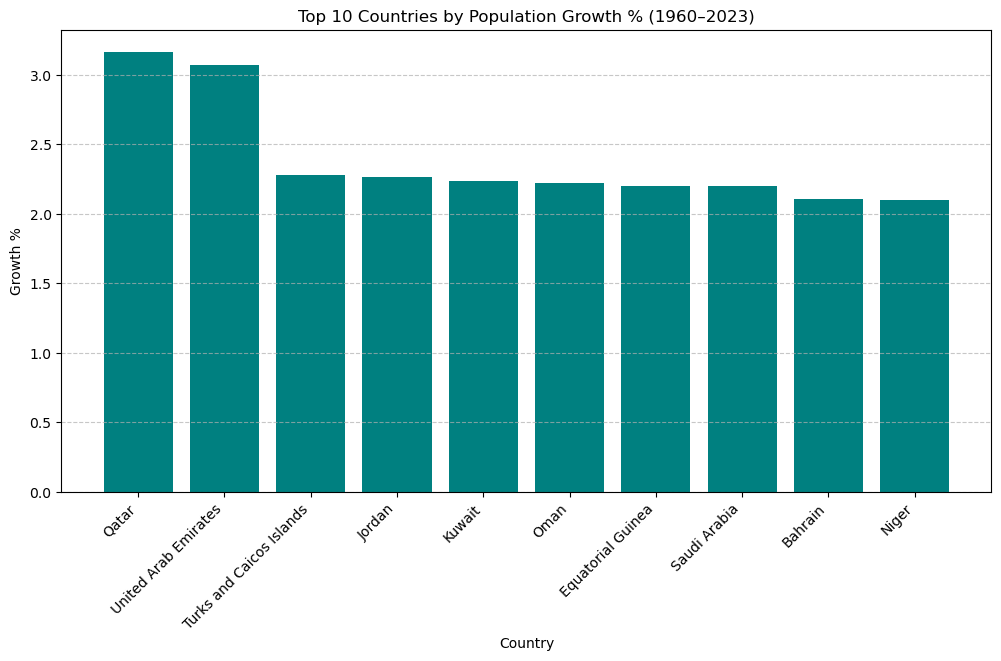

In [47]:
plt.figure(figsize=(12, 6))
plt.bar(top_growth['Country Name'].head(10), top_growth['Growth_%'].head(10), color='teal')
plt.xlabel('Country')
plt.ylabel('Growth %')
plt.title('Top 10 Countries by Population Growth % (1960–2023)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)